In [1]:
%matplotlib inline
import xarray as xr
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
direc = '/u/home/gergel/data/parameters/albedo'
filename = 'maximum_snow_albedo.hdf'
albedo_file = os.path.join(direc, filename)

In [3]:
import pyhdf
from pyhdf.SD import SD, SDC
hdf = SD(albedo_file, SDC.READ)

In [4]:
print (hdf.datasets())

DATAFIELD_NAME='MAX_SNOW_ALBEDO'
albedo = hdf.select(DATAFIELD_NAME)

{'MAX_SNOW_ALBEDO': (('latitude', 'longitude'), (3600, 7200), 5, 0), 'FLAG': (('latitude', 'longitude'), (3600, 7200), 22, 1)}


In [5]:
'''count = 0
for var in albedo: 
    print(var.shape)
    count += 1
print(count)'''

'count = 0\nfor var in albedo: \n    print(var.shape)\n    count += 1\nprint(count)'

In [7]:
print(albedo[:, :].max())
print(albedo[:, :].min())
print(albedo[:, :].mean())
print(albedo[:, :].shape)

0.84
-1.0
-0.438501
(3600, 7200)


In [11]:
type(albedo.get())

numpy.ndarray

In [20]:
pfts = xr.open_dataset(os.path.join('/u/home/gergel/data/parameters/pfts', 
                                    'mksrf_landuse_rc2000_c110913_mod.nc'))

In [19]:
pfts.LANDMASK.values.shape

(3600, 7200)

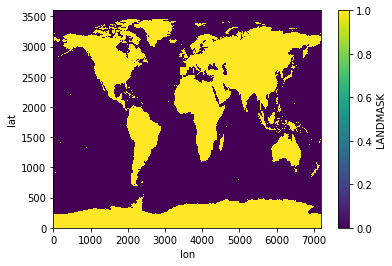

In [18]:
pfts.LANDMASK.plot()

In [15]:
pfts.dims

Frozen(SortedKeysDict({'lat': 3600, 'lon': 7200, 'pft': 17}))

In [21]:
pfts['max_snow_albedo'] = xr.DataArray(np.flipud(albedo.get()),
                                       dims=('lat', 'lon'),
                          coords={'xc': pfts.xc, 'yc': pfts.yc},
                          attrs={'description': "max snow albedo", 
                                     'units': "fraction", 'long_name': "max_snow_albedo"},
                             encoding={"Coordinates": "xc yc"})

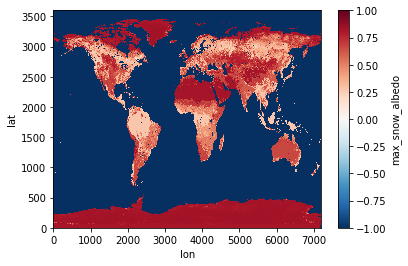

In [22]:
pfts['max_snow_albedo'].plot()

In [23]:
direc = '/u/home/gergel/data/parameters/max_snow_albedo'
new_max_snow_albedo_file = os.path.join(direc, 'max_snow_albedo_barlage_global.nc')
pfts.to_netcdf(new_max_snow_albedo_file, format='NETCDF4_CLASSIC')

In [24]:
u = xr.open_dataset(os.path.join(direc, 'max_snow_albedo_barlage_global.nc'))
u.data_vars

Data variables:
    EDGEE            float32 ...
    EDGEN            float32 ...
    EDGES            float32 ...
    EDGEW            float32 ...
    LANDMASK         (lat, lon) int32 ...
    LAT              (lat) float32 ...
    LATIXY           (lat, lon) float32 ...
    LON              (lon) float32 ...
    LONGXY           (lat, lon) float32 ...
    PCT_PFT          (pft, lat, lon) float64 ...
    max_snow_albedo  (lat, lon) float32 ...